# comparing Gradient descent and Momentum and Nesterov  Momentum using digit- recogniser dataset

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
%cd /content/drive/MyDrive/digit-recognizer

/content/drive/MyDrive/digit-recognizer


In [ ]:
df =  pd.read_csv("train.csv")

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.iloc[:,1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = np.array(df.iloc[: , 1:] / 255)

In [ ]:
Y = np.array(df.iloc[: ,0])

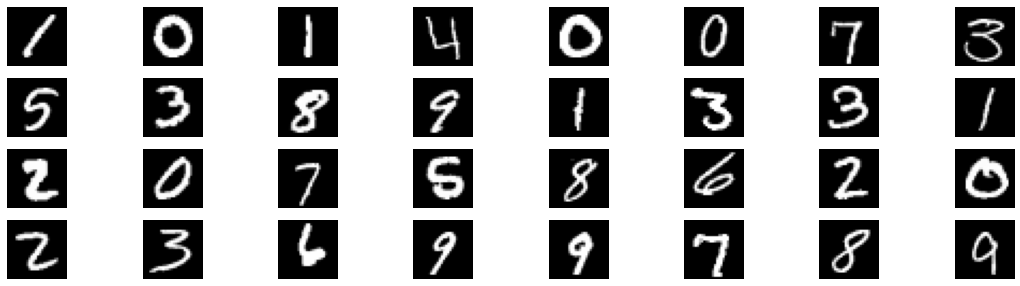

In [ ]:
plt.figure(figsize= (19 , 5))
for i in range(32):
    plt.subplot(4 , 8 , i+1)
    plt.imshow(X[i].reshape((28 , 28)), cmap = "gray")
    plt.axis("off")

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size = 0.2)

# one hot encoding ytrain and ytest for softmax

In [ ]:
ytrain_ind = np.array(pd.get_dummies(ytrain))
ytest_ind = np.array(pd.get_dummies(ytest))

# Decode dummies

In [ ]:
def decode_dummies(x):
    return np.argmax(x , axis = 1)

# code for ANN

## Activation functions

In [ ]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def relu(x):
    return (x * (x > 0))

def softmax(x):
    expA = np.exp(x)
    return (expA / expA.sum(axis = 1 , keepdims = True))

## Forward propagation

In [ ]:
def forward(x , W1 , W2 ,b1 ,b2):
    z = relu((x.dot(W1) + b1))
    # z = sigmoid((x.dot(W1) + b1)) #sigmoid
    # z = np.tanh((x.dot(W1) + b1)) #tanh
    return z , softmax(z.dot(W2) + b2)

## Derivative of loss function with respect to W2 , b2 , W1 , b1

In [ ]:
def derivative_W2(true_t , y , z):
    return (z.T.dot(y - true_t))

def derivative_b2(true_t , y):
    return ((y - true_t).sum(axis = 0))
    

In [ ]:
def derivative_W1(true_t , y , z , x , W2):
    # dz = ((y - true_t).dot(W2.T) * z * (1 - z))  # sigmoid
    # dz = ((y - true_t).dot(b2.T) * (1 - z * z))  # tanh
    dz = ((y - true_t).dot(W2.T) * z * (z > 0))  # relu
    return x.T.dot(dz)

def derivative_b1(true_t , y , z , b2):
    # dz = ((y - true_t).dot(b2.T) * z * (1 - z))  # sigmoid
    # dz = ((y - true_t).dot(b2.T) * (1 - z * z))  # tanh
    dz = ((y - true_t).dot(W2.T) * z * (z > 0)) # relu
    return dz.sum(axis = 0)


## classification metrics

In [ ]:
def cross_entropy(true_t , y):
    return -(np.sum(true_t*np.log(y)))

def accuracy(true_t , y):
    return np.mean(true_t == y)

## Initialize weight and hyper parameters that is common for all

In [ ]:
N , D  =  xtrain.shape
M = 300
K = 10
W1_0 = np.random.randn(D , M) / np.sqrt(D + M)
b1_0 = np.random.randn(M) / np.sqrt(M)
W2_0 = np.random.randn(M ,K) / np.sqrt(M + K)
b2_0 = np.random.randn(K) / np.sqrt(K)

batch_sz = 500
n_batches = int(N / batch_sz)

lr = 0.00004
reg = 0.01

epochs = 150

## 1.Batch gradient descent (relu in hidden)

In [ ]:
W1  = W1_0.copy()
b1  = b1_0.copy()
W2  = W2_0.copy()
b2  = b2_0.copy()

costs_0 = []
acc_0 = []

In [ ]:
for i in range(epochs):
    for j in range(n_batches):
        # converts to batches
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]
        
        # forward propagation
        z , y = forward(xbatch , W1 , W2 , b1 ,b2)

        # gradient descent 

        W2 -= lr * (derivative_W2(ybatch , y , z) + reg * W2)
        b2 -= lr * (derivative_b2(ybatch , y ) + reg * b2)
        W1 -= lr * (derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1)
        b1 -= lr * (derivative_b1(ybatch , y , z , b2) + reg * b1)

        if (j % 20 == 0 ):
            _ ,pY =  forward(xbatch , W1 , W2 , b1 ,b2)
            cost = cross_entropy(ybatch , pY)
            costs_0.append(cost)
            acc = accuracy(decode_dummies(ybatch) , decode_dummies(pY))
            acc_0.append(acc)

            print(f"i = {i} -- j = {j} -- cost - {cost} -- accuracy - {acc}")

_ ,pY =  forward(xtrain , W1 , W2 , b1 ,b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy -- {acc}")
_ ,pY =  forward(xtest , W1 , W2 , b1 ,b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy -- {acc}")

i = 0 -- j = 0 -- cost - 156.0294484914875 -- accuracy - 0.19402985074626866
i = 0 -- j = 20 -- cost - 155.02504153045334 -- accuracy - 0.13432835820895522
i = 0 -- j = 40 -- cost - 156.7384484054631 -- accuracy - 0.05970149253731343
i = 0 -- j = 60 -- cost - 153.34724496972927 -- accuracy - 0.16417910447761194
i = 1 -- j = 0 -- cost - 151.8801584600829 -- accuracy - 0.19402985074626866
i = 1 -- j = 20 -- cost - 150.9457412036935 -- accuracy - 0.19402985074626866
i = 1 -- j = 40 -- cost - 151.75437152432045 -- accuracy - 0.1044776119402985
i = 1 -- j = 60 -- cost - 150.04281537651121 -- accuracy - 0.1791044776119403
i = 2 -- j = 0 -- cost - 148.36029636696668 -- accuracy - 0.2537313432835821
i = 2 -- j = 20 -- cost - 147.56298188284148 -- accuracy - 0.208955223880597
i = 2 -- j = 40 -- cost - 147.53639708891453 -- accuracy - 0.22388059701492538
i = 2 -- j = 60 -- cost - 147.14131783083707 -- accuracy - 0.2835820895522388
i = 3 -- j = 0 -- cost - 145.1145954385886 -- accuracy - 0.328358

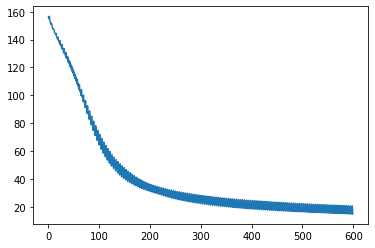

In [ ]:
plt.plot(costs_0)

# 2.Momentum
## This can be achieved by adding a velocity parameter and updating them at each iteration

## W = W + dw
## dw = mu * dw - (lr * (derivative_W + reg * W))

## Note : if we assign mu = 0 then it would be normal batch gradient desccent

In [ ]:
# using same initial weights
W1  = W1_0.copy()
b1  = b1_0.copy()
W2  = W2_0.copy()
b2  = b2_0.copy()

mu = 0.9
dW2 = 0
dW1 = 0
db2 = 0
db1 = 0

costs_1 = []
acc_1 = []

In [ ]:
for i in range(epochs):
    for j in range(n_batches):
        # converts to batches
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]
        
        # forward propagation
        z , y = forward(xbatch , W1 , W2 , b1 ,b2)

        # gradient descent with momentum
 

        dW2 = mu * dW2 - lr * (derivative_W2(ybatch , y , z) + reg * W2)
        W2 += dW2

        db2 = mu * db2 - lr * (derivative_b2(ybatch , y ) + reg * b2)
        b2 += db2

        dW1 = mu * dW1 - lr * (derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1)
        W1 += dW1 

        db1 = mu * db1 - lr * (derivative_b1(ybatch , y , z , b2) + reg * b1)
        b1 += db1
         

        if (j % 20 == 0 ):
            _ ,pY =  forward(xbatch , W1 , W2 , b1 ,b2)
            cost = cross_entropy(ybatch , pY)
            costs_1.append(cost)
            acc = accuracy(decode_dummies(ybatch) , decode_dummies(pY))
            acc_1.append(acc)

            print(f"i = {i} -- j = {j} -- cost - {cost} -- accuracy - {acc}")

_ ,pY =  forward(xtrain , W1 , W2 , b1 ,b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy -- {acc}")
_ ,pY =  forward(xtest , W1 , W2 , b1 ,b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy -- {acc}")

i = 0 -- j = 0 -- cost - 156.0294484914875 -- accuracy - 0.19402985074626866
i = 0 -- j = 20 -- cost - 148.56621524450406 -- accuracy - 0.208955223880597
i = 0 -- j = 40 -- cost - 139.2886573963621 -- accuracy - 0.44776119402985076
i = 0 -- j = 60 -- cost - 135.13611366135578 -- accuracy - 0.4626865671641791
i = 1 -- j = 0 -- cost - 129.0634410411131 -- accuracy - 0.6417910447761194
i = 1 -- j = 20 -- cost - 122.56903201401988 -- accuracy - 0.582089552238806
i = 1 -- j = 40 -- cost - 109.93319597946913 -- accuracy - 0.6567164179104478
i = 1 -- j = 60 -- cost - 101.0326428084856 -- accuracy - 0.7014925373134329
i = 2 -- j = 0 -- cost - 94.23359244067038 -- accuracy - 0.8059701492537313
i = 2 -- j = 20 -- cost - 89.32485670913738 -- accuracy - 0.6865671641791045
i = 2 -- j = 40 -- cost - 76.87990603845896 -- accuracy - 0.7611940298507462
i = 2 -- j = 60 -- cost - 64.94324928272192 -- accuracy - 0.7761194029850746
i = 3 -- j = 0 -- cost - 59.23399374945376 -- accuracy - 0.8656716417910447

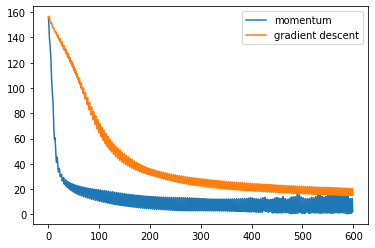

In [ ]:
plt.plot(costs_1 , label = "momentum")
plt.plot(costs_0 , label = "gradient descent")
plt.legend()

# 3.Nesterov momentum

## gW = lr * (derivative_W + reg * W)
## dw = mu * dw - gW
## W  = W + mu*dw - gW

## Note : if we assign mu = 0 then it would be normal batch gradient desccent

In [ ]:
# using same initial weights
W1  = W1_0.copy()
b1  = b1_0.copy()
W2  = W2_0.copy()
b2  = b2_0.copy()

mu = 0.9
dW2 = 0
dW1 = 0
db2 = 0
db1 = 0

costs_2 = []
acc_2 = []

In [ ]:
for i in range(epochs):
    for j in range(n_batches):
        # converts to batches
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]
        
        # forward propagation
        z , y = forward(xbatch , W1 , W2 , b1 ,b2)


        # gradient descent with Nesterov momentum
 
        gW2 = lr * (derivative_W2(ybatch , y , z) + reg * W2)
        dW2 = mu * dW2 - gW2
        W2 += mu * dW2 - gW2
        
        gb2 = lr * (derivative_b2(ybatch , y ) + reg * b2)
        db2 = mu * db2 - gb2
        b2 += mu * db2 - gb2
         
        gW1 = lr * (derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1)
        dW1 = mu * dW1 - gW1
        W1 += mu * dW1 - gW1 
        
        gb1 = lr * (derivative_b1(ybatch , y , z , b2) + reg * b1)
        db1 = mu * db1 - gb1
        b1 += mu * db1 - gb1
         

        if (j % 20 == 0 ):
            _ ,pY =  forward(xbatch , W1 , W2 , b1 ,b2)
            cost = cross_entropy(ybatch , pY)
            costs_2.append(cost)
            acc = accuracy(decode_dummies(ybatch) , decode_dummies(pY))
            acc_2.append(acc)

            print(f"i = {i} -- j = {j} -- cost - {cost} -- accuracy - {acc}")

_ ,pY =  forward(xtrain , W1 , W2 , b1 ,b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy -- {acc}")
_ ,pY =  forward(xtest , W1 , W2 , b1 ,b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy -- {acc}")

i = 0 -- j = 0 -- cost - 155.91234834597168 -- accuracy - 0.19402985074626866
i = 0 -- j = 20 -- cost - 148.15360892782502 -- accuracy - 0.208955223880597
i = 0 -- j = 40 -- cost - 138.87399403533396 -- accuracy - 0.43283582089552236
i = 0 -- j = 60 -- cost - 134.57092368253745 -- accuracy - 0.4626865671641791
i = 1 -- j = 0 -- cost - 128.4188003258052 -- accuracy - 0.6417910447761194
i = 1 -- j = 20 -- cost - 121.87778157879438 -- accuracy - 0.5970149253731343
i = 1 -- j = 40 -- cost - 109.10450959531295 -- accuracy - 0.6716417910447762
i = 1 -- j = 60 -- cost - 99.86073832468242 -- accuracy - 0.7014925373134329
i = 2 -- j = 0 -- cost - 92.91911277128914 -- accuracy - 0.8059701492537313
i = 2 -- j = 20 -- cost - 88.09466050071501 -- accuracy - 0.6716417910447762
i = 2 -- j = 40 -- cost - 75.61006696937989 -- accuracy - 0.7761194029850746
i = 2 -- j = 60 -- cost - 63.8239932385126 -- accuracy - 0.7910447761194029
i = 3 -- j = 0 -- cost - 57.964423232173985 -- accuracy - 0.8805970149253

# plotting costs

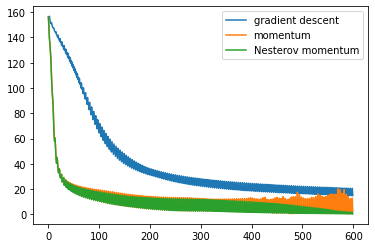

In [ ]:
plt.plot(costs_0 , label = "gradient descent")
plt.plot(costs_1 , label = "momentum")
plt.plot(costs_2 , label = "Nesterov momentum")
plt.legend()

# plotting Accuracy

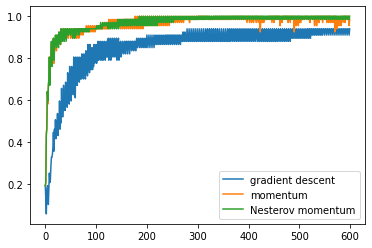

In [ ]:
plt.plot(acc_0 , label = "gradient descent")
plt.plot(acc_1 , label = "momentum")
plt.plot(acc_2 , label = "Nesterov momentum")
plt.legend()

# conclusion :

## Using momentum decreases cost faster than normal gradient descent
## Using Normal momentum and nesterov momentum is almost the same